In [2]:
import pandas as pd

In [3]:
A = pd.read_csv("E:/Python/Dataset/Credit.csv")

In [4]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
import matplotlib.pyplot as plt
import seaborn as sb

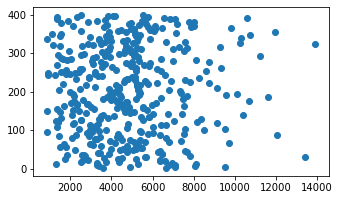

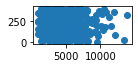

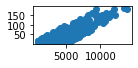

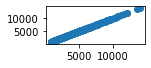

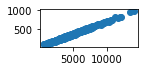

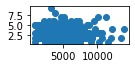

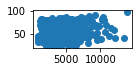

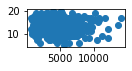

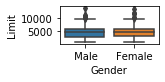

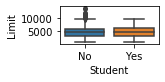

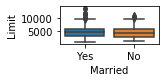

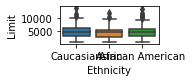

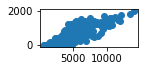

In [32]:

plt.figure(figsize=(18,18))
m = 1
for i in A.columns:
    if(A[i].dtypes=="object"):
        plt.subplot(5,3,m)
        sb.boxplot(A[i],A.Limit)
        plt.show()
        m = m+1
    else:
        plt.subplot(5,3,m)
        plt.scatter(A.Limit,A[i])
        plt.show()
        m = m+1


In [10]:
Y = A[["Limit"]]
X = A.drop(labels=["Unnamed: 0","ID","Limit"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)

In [11]:
X

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,43,99,1,11,6,0,0,1,2,67
1,366,219,2,59,10,1,1,1,1,196
2,365,231,3,48,6,0,0,0,1,126
3,388,265,2,13,6,1,0,0,1,210
4,294,143,1,45,11,0,0,1,2,66
5,344,249,3,54,5,0,0,0,2,243
6,99,81,1,14,7,1,0,0,0,41
7,333,230,1,64,4,0,0,0,1,190
8,47,88,4,43,8,1,0,0,2,56
9,332,222,2,18,14,1,1,1,0,261


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [20]:
import numpy as np
np.mean(A.Income)

45.218885000000036

In [21]:
np.std(A.Income)

35.20019025455366

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)


In [23]:
ytest

,Limit
35,2558
316,7306
281,1852
74,5390
296,5140
337,855
235,2923
259,6196
220,5765
155,1362


In [1]:
for i in range(2,20,1):
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=i)
    model = knr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    from sklearn.metrics 
    import mean_absolute_error
    print("if k = %d then MAE is %.2f"%(i,mean_absolute_error(ytest,pred)))


SyntaxError: invalid syntax (<ipython-input-1-96aa3976893c>, line 6)

In [25]:
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,20,1)}
knr = KNeighborsRegressor()

cv = GridSearchCV(knr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

NameError: name 'KNeighborsRegressor' is not defined

In [15]:
knr = KNeighborsRegressor(n_neighbors=16)
model = knr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
print("MAE is %.2f"%(mean_absolute_error(ytest,pred)))

MAE is 492.82


In [16]:
Y = A[["Student"]]
X = A.drop(labels=["Unnamed: 0","ID","Student"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)


In [18]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender,Married,Ethnicity,Balance
0,-1.353573,-0.548978,-0.474492,-0.699130,-1.260420,-0.784930,-1.035635,0.795395,0.907841,-0.440765
1,1.452570,1.117239,1.088373,0.031032,1.535336,0.496588,0.965592,0.795395,-0.302614,0.958661
2,1.443883,1.215779,1.244659,0.761194,0.894642,-0.784930,-1.035635,-1.257237,-0.302614,0.199283
3,1.643701,1.583063,1.687471,0.031032,-1.143930,-0.784930,0.965592,-1.257237,-0.302614,1.110537
4,0.827052,0.203507,0.098558,-0.699130,0.719907,0.816968,-1.035635,0.795395,0.907841,-0.451613
5,1.261440,1.457649,1.479089,0.761194,1.244112,-1.105309,-1.035635,-1.257237,0.907841,1.468529
6,-0.867059,-0.674393,-0.708922,-0.699130,-1.085685,-0.464550,0.965592,-1.257237,-1.513069,-0.722820
7,1.165875,1.233695,1.231635,-0.699130,1.826561,-1.425689,-1.035635,-1.257237,-0.302614,0.893571
8,-1.318822,-0.710225,-0.617755,1.491355,0.603417,-0.144171,0.965592,-1.257237,0.907841,-0.560096
9,1.157187,1.153072,1.127444,0.031032,-0.852706,1.778107,0.965592,0.795395,-1.513069,1.663798


In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=5)
model = knr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9375

In [22]:
from sklearn.model_selection import GridSearchCV
tp = {"n_neighbors":range(2,20,1)}
knc = KNeighborsClassifier()
cv = GridSearchCV(knc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(X,Y)
cvmodel.best_params_

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was

{'n_neighbors': 4}

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knr = KNeighborsClassifier(n_neighbors=4)
model = knr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9375